In [1]:
import numpy as np
import pandas as pd
import gc
import os
from multiprocessing import Pool, cpu_count
NTHREAD = cpu_count()
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import utils

In [16]:
def feature_vs_y(feature, y, feature_name=None, kind='kde', bw_method=None, bins=100):
    
    if feature_name is None:
        feature_name = feature.name
    
    df = y.to_frame('y')
    df[feature_name] = feature
    y0 = df[df.y==0]
    y1 = df[df.y==1]
    y0[feature_name].name = 'Actual:0'
    y1[feature_name].name = 'Actual:1'
    if kind=='kde':
        y0[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
        y1[feature_name].plot(kind='kde', legend=True, bw_method=bw_method)
    elif kind=='hist':
        y0[feature_name].plot(kind='hist',legend=True, bins=bins)
        y1[feature_name].plot(kind='hist',legend=True, bins=bins)
        
    plt.xlabel(f'{feature_name}')
    plt.title(f'{feature_name} Distribution', fontsize=13, alpha=0.5)
    plt.show()

In [3]:
train = utils.load_train(['SK_ID_CURR', 'TARGET'])
test = utils.load_test(['SK_ID_CURR'])
prev = utils.read_pickles('../data/previous_application', ['SK_ID_CURR', 'SK_ID_PREV'])
bure = utils.read_pickles('../data/bureau', ['SK_ID_CURR', 'SK_ID_BUREAU'])

100%|██████████| 20/20 [00:21<00:00,  1.08s/it]


In [9]:
prev['data'] = 'train'
prev.loc[prev.SK_ID_CURR.isin(test.SK_ID_CURR), 'data'] = 'test'

bure ['data'] = 'train'
bure.loc[bure.SK_ID_CURR.isin(test.SK_ID_CURR), 'data'] = 'test'

In [10]:
prev_ = pd.merge(prev, train, on='SK_ID_CURR', how='inner')
bure_ = pd.merge(bure, train, on='SK_ID_CURR', how='inner')

In [11]:
prev_.head()

,SK_ID_CURR,SK_ID_PREV,data,TARGET
0,100002,1038818,train,1
1,100003,2396755,train,0
2,100003,2636178,train,0
3,100003,1810518,train,0
4,100004,1564014,train,0


In [13]:
train.set_index('SK_ID_CURR', inplace=True)

In [14]:
train['SK_ID_PREV_min'] = prev_.groupby('SK_ID_CURR').SK_ID_PREV.min()
train['SK_ID_PREV_mean'] = prev_.groupby('SK_ID_CURR').SK_ID_PREV.mean()
train['SK_ID_PREV_max'] = prev_.groupby('SK_ID_CURR').SK_ID_PREV.max()
train['SK_ID_PREV_median'] = prev_.groupby('SK_ID_CURR').SK_ID_PREV.median()
train['SK_ID_PREV_std'] = prev_.groupby('SK_ID_CURR').SK_ID_PREV.std()

In [21]:
train['SK_ID_PREV_std-d-mean'] = train['SK_ID_PREV_std'] / train['SK_ID_PREV_mean']
train['SK_ID_PREV_max-m-min'] = train['SK_ID_PREV_max'] - train['SK_ID_PREV_min']

In [20]:
train['SK_ID_BUREAU_min'] = bure_.groupby('SK_ID_CURR').SK_ID_BUREAU.min()
train['SK_ID_BUREAU_mean'] = bure_.groupby('SK_ID_CURR').SK_ID_BUREAU.mean()
train['SK_ID_BUREAU_max'] = bure_.groupby('SK_ID_CURR').SK_ID_BUREAU.max()
train['SK_ID_BUREAU_median'] = bure_.groupby('SK_ID_CURR').SK_ID_BUREAU.median()
train['SK_ID_BUREAU_std'] = bure_.groupby('SK_ID_CURR').SK_ID_BUREAU.std()

In [23]:
train['SK_ID_BUREAU_std-d-mean'] = train['SK_ID_BUREAU_std'] / train['SK_ID_BUREAU_mean']
train['SK_ID_BUREAU_max-m-min'] = train['SK_ID_BUREAU_max'] - train['SK_ID_BUREAU_min']

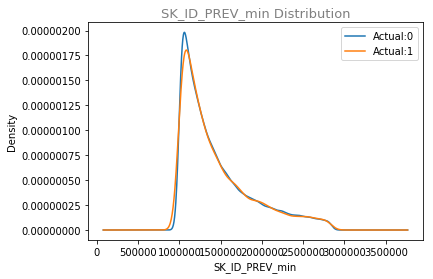

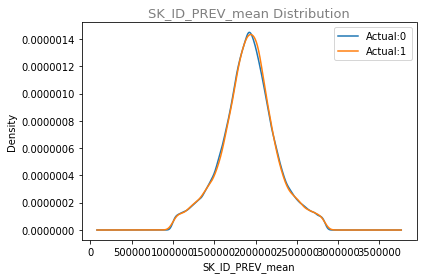

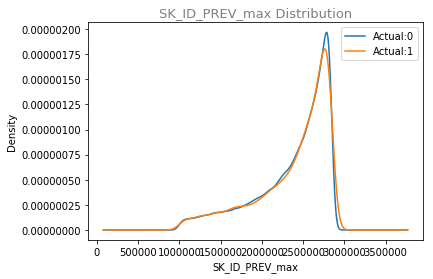

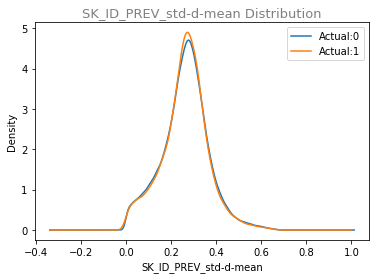

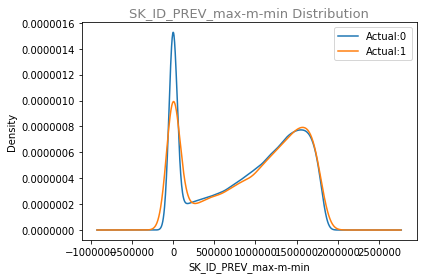

In [22]:
feature_vs_y(train.SK_ID_PREV_min, train.TARGET)
feature_vs_y(train.SK_ID_PREV_mean, train.TARGET)
feature_vs_y(train.SK_ID_PREV_max, train.TARGET)
feature_vs_y(train['SK_ID_PREV_std-d-mean'], train.TARGET)
feature_vs_y(train['SK_ID_PREV_max-m-min'], train.TARGET)

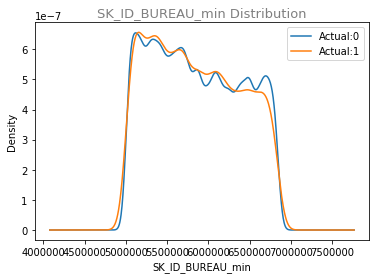

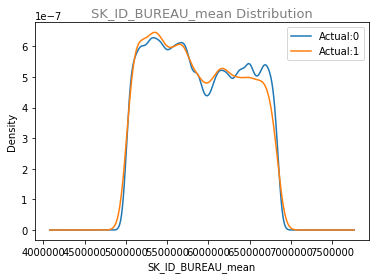

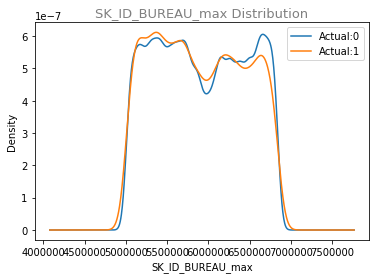

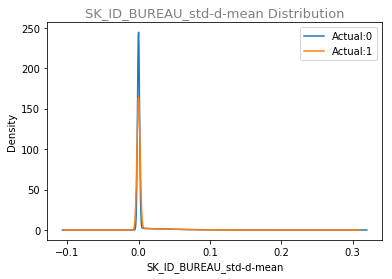

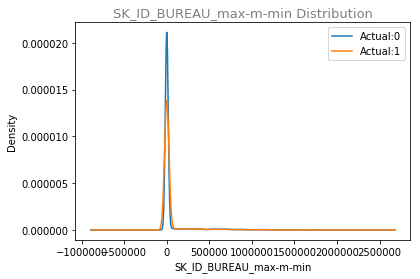

In [24]:
feature_vs_y(train.SK_ID_BUREAU_min, train.TARGET)
feature_vs_y(train.SK_ID_BUREAU_mean, train.TARGET)
feature_vs_y(train.SK_ID_BUREAU_max, train.TARGET)
feature_vs_y(train['SK_ID_BUREAU_std-d-mean'], train.TARGET)
feature_vs_y(train['SK_ID_BUREAU_max-m-min'], train.TARGET)